In [1]:
import pandas as pd
messages = pd.read_csv('SMSSpamCollection.txt', sep='\t', names=['label', 'message'])

In [2]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
messages['message'].loc[100]

"Please don't text me anymore. I have nothing else to say."

In [4]:
# Data cleaning and preprocessing
import re
import nltk

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [7]:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z0-9]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [8]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free mem

In [9]:
# Creating the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500, binary=True)
X = cv.fit_transform(corpus).toarray()

In [10]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5572, 2500))

In [11]:
X.shape

(5572, 2500)

In [12]:
y = pd.get_dummies(messages['label'])
y = y.iloc[:, 1].values
y = y.astype(int)

In [13]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [14]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [15]:
y_pred = spam_detect_model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, classification_report

In [17]:
score = accuracy_score(y_test, y_pred)
print(score)

0.9865470852017937


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.97      0.94      0.95       160

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [19]:
# Creating the TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500,ngram_range=(1,2))
X = tfidf.fit_transform(corpus).toarray()

In [20]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [21]:
from sklearn.naive_bayes import MultinomialNB 
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [22]:
# Predicting the Test set results
y_pred = spam_detect_model.predict(X_test)

In [23]:
score = accuracy_score(y_test, y_pred)
print(score)

0.9811659192825112


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       1.00      0.87      0.93       160

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [25]:
from sklearn.ensemble import RandomForestClassifier
spam_detect_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = spam_detect_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.9838565022421525


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       1.00      0.89      0.94       160

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.98      0.98      0.98      1115



## Word 2vec Implementation

In [27]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [29]:
from nltk.corpus import stopwords
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z0-9]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [30]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling 3 week word back like fun still tb ok xxx std chgs send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune',
 'winner valued network customer selected receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobile 11 month u r entitled update latest colour mobile camera free call mobile update co free 08002986030',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6days 16 tsandcs apply reply

In [31]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [32]:
corpus[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [33]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
words = []
for text in corpus:
    # Each 'text' is already a single processed document.
    # We can just process it directly without sent_tokenize.
    tokens = simple_preprocess(text)
    words.append(tokens)

In [36]:
words

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply',
  'over'],
 ['dun', 'say', 'early', 'hor', 'already', 'say'],
 ['nah', 'think', 'go', 'usf', 'life', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'caller',
  'press',
  'copy',
  'friend',
  'callertune'],
 ['winner',
  'valued',
  'network',
  'customer',
  'selected',
  're

In [37]:
import gensim

In [38]:
model = gensim.models.Word2Vec(words, vector_size=100, window=5, min_count=2, workers=4)

In [39]:
model.wv.index_to_key

['call',
 'get',
 'ur',
 'gt',
 'lt',
 'go',
 'ok',
 'day',
 'free',
 'know',
 'come',
 'like',
 'good',
 'time',
 'got',
 'love',
 'text',
 'want',
 'send',
 'one',
 'need',
 'txt',
 'today',
 'going',
 'stop',
 'home',
 'lor',
 'sorry',
 'see',
 'still',
 'take',
 'mobile',
 'back',
 'da',
 'dont',
 'reply',
 'think',
 'tell',
 'week',
 'phone',
 'hi',
 'new',
 'later',
 'please',
 'pls',
 'co',
 'msg',
 'dear',
 'make',
 'night',
 'message',
 'well',
 'say',
 'min',
 'thing',
 'much',
 'hope',
 'oh',
 'claim',
 'great',
 'hey',
 'number',
 'give',
 'happy',
 'work',
 'friend',
 'wat',
 'way',
 'yes',
 'www',
 'let',
 'prize',
 'right',
 'tomorrow',
 'already',
 'said',
 'ask',
 'win',
 'amp',
 'cash',
 'life',
 'im',
 'yeah',
 'tone',
 'really',
 'babe',
 'meet',
 'find',
 'miss',
 'morning',
 'last',
 'service',
 'uk',
 'thanks',
 'care',
 'would',
 'anything',
 'com',
 'year',
 'also',
 'nokia',
 'lol',
 'every',
 'feel',
 'keep',
 'pick',
 'sure',
 'sent',
 'contact',
 'urgent',


In [40]:
model.corpus_count

5572

In [41]:
model.epochs

5

In [46]:
model.wv.similar_by_word('freedom')

[('joy', 0.9574211239814758),
 ('wow', 0.9570072293281555),
 ('huh', 0.9567583799362183),
 ('able', 0.9566000699996948),
 ('pub', 0.9563217759132385),
 ('trying', 0.9561266899108887),
 ('mother', 0.9560447931289673),
 ('expensive', 0.9558820128440857),
 ('immediately', 0.9557758569717407),
 ('busy', 0.955747663974762)]

In [48]:
model.wv['kid'].shape

(100,)

In [57]:
import numpy as np

In [58]:
def avg_word2vec(doc):
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key], axis=0)

In [59]:
from tqdm import tqdm


In [60]:
words[73]

['performed']

In [61]:
type(words[73])

list

In [62]:
X=[]
for i in tqdm(range(len(words))):
    X.append(avg_word2vec(words[i]))

  0%|          | 0/5572 [00:00<?, ?it/s]

d:\QUANTUM COMPUTING\Industry Projects\.venv\lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\QUANTUM COMPUTING\Industry Projects\.venv\lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 5572/5572 [00:01<00:00, 3699.34it/s]


In [70]:
def avg_word2vec(doc):
    vectors = [model.wv[word] for word in doc if word in model.wv.index_to_key]
    if len(vectors) > 0:
        mean_vec = np.mean(vectors, axis=0)
        # Ensure mean_vec is 1D and has the correct shape
        return mean_vec.reshape(model.vector_size)
    else:
        return np.zeros(model.vector_size)

In [71]:
X = [avg_word2vec(doc) for doc in words]
X_new = np.array(X)

In [74]:
words[1]

['ok', 'lar', 'joking', 'wif', 'oni']

In [76]:
X_new[1]

array([-0.10765538,  0.1526735 ,  0.07513957,  0.03550635,  0.08002022,
       -0.29412499,  0.05274979,  0.32176921, -0.07909161, -0.08667745,
       -0.12825993, -0.24728751, -0.01910972,  0.08541141,  0.02505613,
       -0.15633878,  0.00264739, -0.28329805, -0.0276547 , -0.33746403,
        0.07220782,  0.06927682,  0.03758891, -0.09049539, -0.06221859,
        0.00300483, -0.14604509, -0.14516601, -0.13708714,  0.03814283,
        0.20054002,  0.01837591,  0.05741122, -0.10780321, -0.0576089 ,
        0.16119714, -0.00560663, -0.13850348, -0.15354875, -0.28983718,
       -0.05327273, -0.16300246, -0.03591107,  0.06376572,  0.16737998,
       -0.0704052 , -0.0871688 , -0.03067771,  0.08199487,  0.14009912,
        0.08891088, -0.1994476 , -0.06579374, -0.03104997, -0.15552485,
        0.05302084,  0.12764043,  0.02858896, -0.22284877,  0.03774322,
        0.03621641,  0.04907476, -0.06888364,  0.00726563, -0.19610271,
        0.11868741,  0.07128153,  0.11402684, -0.21554938,  0.21

In [77]:
X_new

array([[-0.15946384,  0.21388918,  0.10589007, ..., -0.23587532,
         0.05395688,  0.01939273],
       [-0.10765538,  0.1526735 ,  0.07513957, ..., -0.16473795,
         0.03738907,  0.01125476],
       [-0.15400258,  0.20016734,  0.09716079, ..., -0.21127771,
         0.04742371,  0.019134  ],
       ...,
       [-0.03448242,  0.04215156,  0.0154184 , ..., -0.04803871,
         0.01365651,  0.00303639],
       [-0.17552952,  0.23069216,  0.11415576, ..., -0.24960345,
         0.05808753,  0.01883619],
       [-0.13364469,  0.17496026,  0.07937416, ..., -0.18507023,
         0.03351328,  0.01222141]], shape=(5572, 100))

In [78]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)


In [79]:
# Applying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [81]:
# Performance Evaluation
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.957847533632287
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       966
           1       0.93      0.74      0.82       149

    accuracy                           0.96      1115
   macro avg       0.95      0.86      0.90      1115
weighted avg       0.96      0.96      0.96      1115



In [82]:
# Example new email
new_email = "Congratulations! You have won a free lottery. Click here to claim your prize."

# Preprocess (use same steps as training)
import re
from gensim.utils import simple_preprocess

review = re.sub('[^a-zA-Z0-9]', ' ', new_email)
review = review.lower()
tokens = simple_preprocess(review)

# Get average word2vec vector
email_vec = avg_word2vec(tokens).reshape(1, -1)

# Predict
prediction = clf.predict(email_vec)
print("Spam" if prediction[0] == 1 else "Ham")

Spam


## Visualizations for Spam Classifier
The following visualizations will help you understand your model and data better.

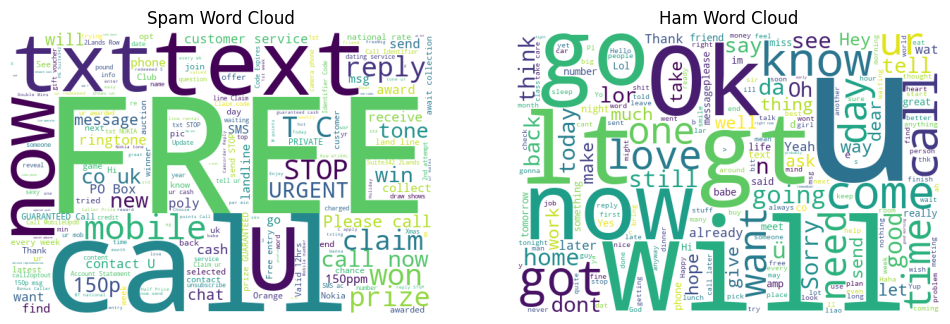

In [85]:
# 1. Word Cloud for Spam and Ham messages
from wordcloud import WordCloud
import matplotlib.pyplot as plt
spam_words = ' '.join(messages[messages['label']=='spam']['message'])
ham_words = ' '.join(messages[messages['label']=='ham']['message'])
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(spam_words))
plt.title('Spam Word Cloud')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(ham_words))
plt.title('Ham Word Cloud')
plt.axis('off')
plt.show()

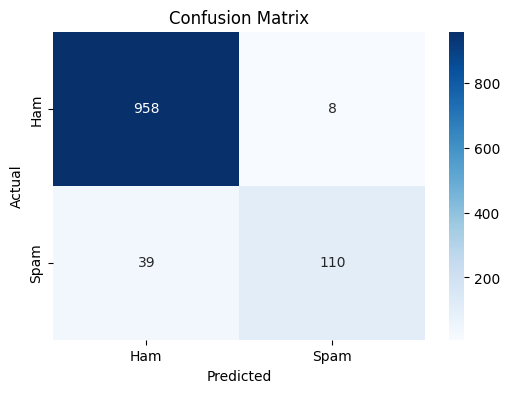

In [86]:
# 2. Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

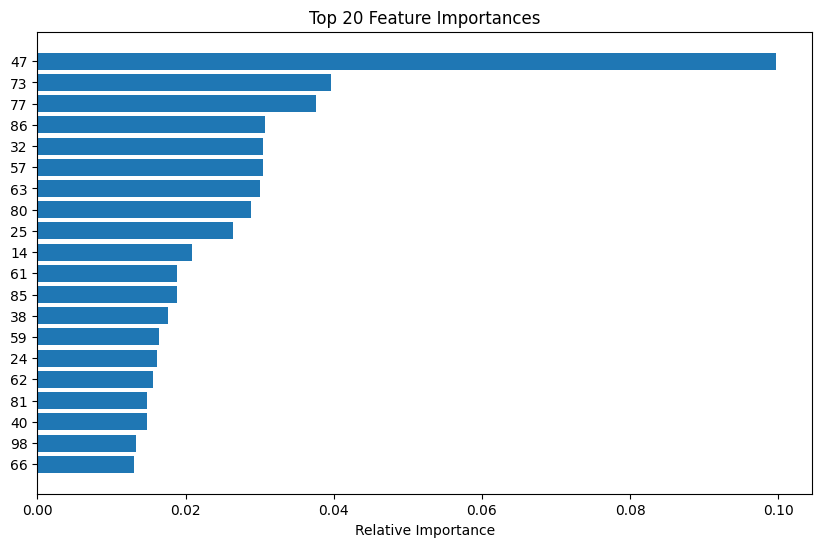

In [87]:
# 3. Feature Importance from Random Forest
import numpy as np
importances = clf.feature_importances_ if hasattr(clf, 'feature_importances_') else None
if importances is not None:
    indices = np.argsort(importances)[-20:]
    plt.figure(figsize=(10,6))
    plt.title('Top 20 Feature Importances')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [str(i) for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
else:
    print('Feature importances not available for this model.')

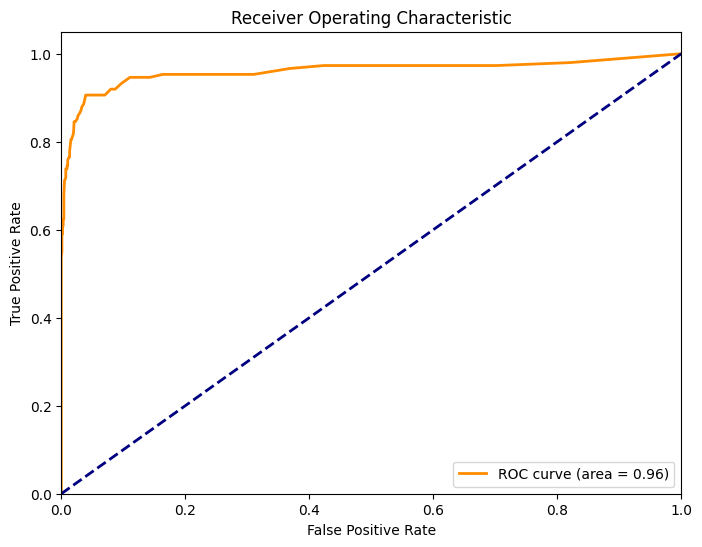

In [88]:
# 4. ROC Curve & AUC
from sklearn.metrics import roc_curve, auc
y_score = clf.predict_proba(X_test)[:,1] if hasattr(clf, 'predict_proba') else None
if y_score is not None:
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
else:
    print('ROC curve not available for this model.')

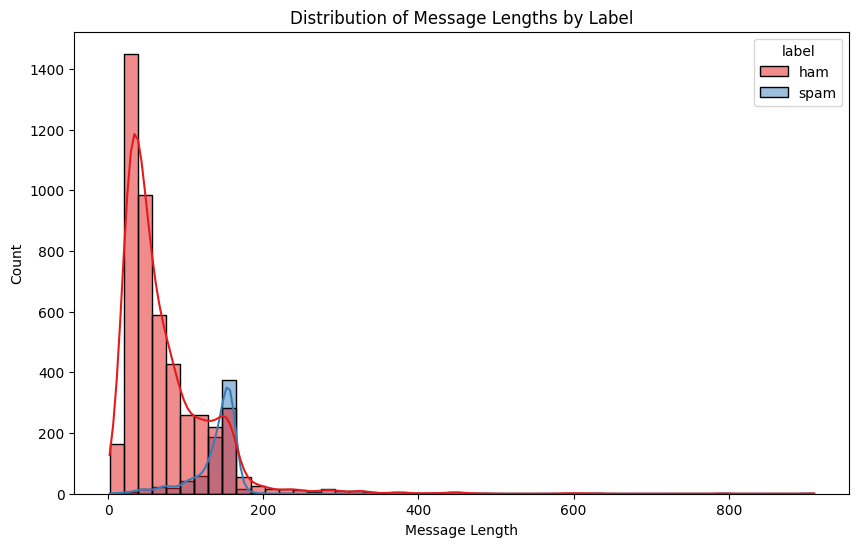

In [89]:
# 5. Distribution of Message Lengths for Spam vs Ham
messages['length'] = messages['message'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(data=messages, x='length', hue='label', bins=50, kde=True, palette='Set1')
plt.title('Distribution of Message Lengths by Label')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()